In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from map_test import GridMap

In [2]:
"""
fastest car task using visual recognition 

Map : 200 by 200

Robot has a footprint of 20cm x 21cm

The best position is to have the camera 20cm away from the obstacle to recognize an image.

obstacle will be placed at the centre of the carpark
- obstacle 1 : 10 x 10
- obstacle 2 : 60 x 10

parking barrier will be 60cm wide

wall/barrier is approximately 50cm away from obstacle 2

right / left arrow only

Time out for this task is 3min.
"""

'\nfastest car task using visual recognition \n\nMap : 200 by 200\n\nRobot has a footprint of 20cm x 21cm\n\nThe best position is to have the camera 20cm away from the obstacle to recognize an image.\n\nobstacle will be placed at the centre of the carpark\n- obstacle 1 : 10 x 10\n- obstacle 2 : 60 x 10\n\nparking barrier will be 60cm wide\n\nwall/barrier is approximately 50cm away from obstacle 2\n\nright / left arrow only\n\nTime out for this task is 3min.\n'

In [3]:
directions = {
    'Left': np.pi/2, # 90 degree
    'East': 2*np.pi,  # 360 degree
    'Right': (3*np.pi)/2, # 270 degree
    'West': np.pi # 180 degree
}

# Expected orientation of robot when facing obstacle
robotPositions = {
    'L': directions['Right'],
    #'E': directions['West'],
    'R': directions['Left'],
    #'W': directions['East']
}

In [4]:
# # Positions RC is expected to be in to accurately capture the image of the obstacles
# # Obstacle Orientation to RC Position
# # North:    Y-Axis + 2, Directions to be South
# # East:     X-Axis + 2, Directions to be West
# # South:    Y-Axis - 2, Directions to be North
# # West:     X-Axis - 2, Directions to be East
# def expectedPos(obstacle):
#     obsOrient = obstacle[2]
#     ax = obstacle[0]
#     ay = obstacle[1]

#     if obsOrient == 'L': ay += 2
#     # elif obsOrient == 'E': ax += 2
#     elif obsOrient == 'R': ay -= 2
#     # else: ax -= 2
    
#     orient = robotPositions[obsOrient]
#     finalPos = (ax, ay, orient)
#     return finalPos

In [5]:
# where the obstacles will be placed

obstacleList = [(7, 10, 'L'),
                (14, 10, 'L')]


In [6]:
# # start and end positions
# initPosition = (10, 0, directions['East'])

# # First element represents the inital position the RC will be in
# positions = [initPosition]

# # Possible positions RC will complete its pathing in
# finalPositions = [(10, 0, directions['West'])]

In [7]:
# for obs in obstacleList:
#     positions.append(expectedPos(obs))

In [8]:
# Define start and end positions
start_position = (10, 0)
end_position = (10, 0)

In [9]:
map = GridMap([20, 20])
for obstacle in obstacleList:
    map.setObstacles(obstacle)

map.printGrid()

Setting obstacle: (7, 10, 'L')
Setting obstacle: (14, 10, 'L')
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.

In [10]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [11]:
def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

In [12]:
# A* algorithm implementation
def a_star(gridmap, start, goal):
    open_set = PriorityQueue()
    open_set.put(start, 0)
    came_from = {}
    g_score = {start: 0}

    while not open_set.empty():
        current = open_set.get()

        if current == goal:
            path = reconstruct_path(came_from, current)
            return path

        for neighbor in gridmap.get_neighbors(current):
            tentative_g_score = g_score[current] + 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                priority = tentative_g_score + heuristic(neighbor, goal)
                open_set.put(neighbor, priority)

    return None

In [13]:
# Function to simulate the robot's movement based on the path
def move_robot(grid, path):
    if path is not None:
        for position in path:
            grid.printGrid()  # Print the grid before moving
            grid.setObstacles(position)  # Move the robot
            input("Press Enter to continue...")
    else:
        print("No valid path found.")

In [14]:

# Find path to the first obstacle
path_to_first_obstacle = a_star(map, start_position, obstacleList[0][:2])

# Simulate movement to the first obstacle
move_robot(map, path_to_first_obstacle)

# Update start position for the second obstacle
start_position = obstacleList[0][:2]

# Find path to the second obstacle
path_to_second_obstacle = a_star(map, start_position, obstacleList[1][:2])

# Simulate movement to the second obstacle
move_robot(map, path_to_second_obstacle)

# Update start position for the final destination
start_position = obstacleList[1][:2]

# Find path to the final destination
path_to_final_destination = a_star(map, start_position, end_position)

# Simulate movement to the final destination
move_robot(map, path_to_final_destination)

No valid path found.
No valid path found.
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', 'L', '.', '.'

In [15]:
# Display the final grid
map.printGrid()

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', 'X', 'X', '.', 'X', 'X', 'X', 'X', 'L', '.', '.', '.', 

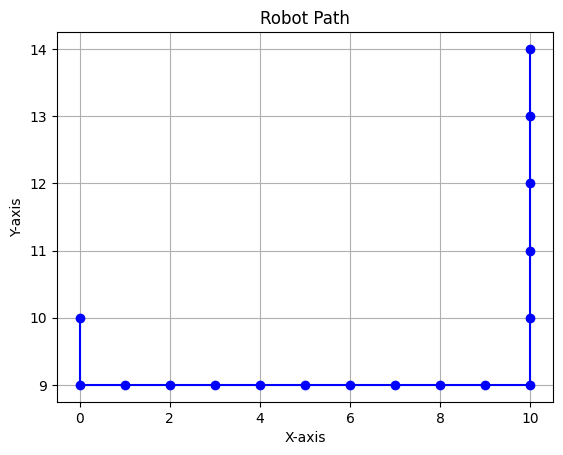

In [16]:
# Plot the final path on a graph
path_points = list(zip(*path_to_final_destination))
plt.plot(path_points[1], path_points[0], marker='o', linestyle='-', color='b')
plt.title('Robot Path')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()